In [1]:
# Step 1: Import libraries

import pandas as pd
import numpy as np
import random

# For reproducibility
np.random.seed(42)
random.seed(42)

In [2]:
# Obscure horror books list

books = [
    ("The Cipher", "Kathe Koja", "Cosmic Horror"),
    ("The Fisherman", "John Langan", "Lovecraftian"),
    ("Come Closer", "Sara Gran", "Psychological Horror"),
    ("The Watchers", "A.M. Shine", "Supernatural Horror"),
    ("Ghost Summer", "Tananarive Due", "Southern Gothic"),
    ("Maggie's Grave", "David Sodergren", "Folk Horror"),
    ("Burn Street Haunting", "Nicole Willson", "Haunted House"),
    ("House of Leaves", "Mark Z. Danielewski", "Experimental Horror"),
    ("Motherthing", "Ainslie Hogarth", "Psychological Horror"),
    ("These Evil Things We Do", "Mick Garris", "Anthology Horror")
]

In [3]:
age_groups = ["18-24", "25-34", "35-44", "45-54", "55+"]
genders = ["Male", "Female", "Non-binary"]
regions = ["UK", "USA", "Canada", "Australia", "Germany"]
income_levels = ["Low", "Medium", "High"]

In [4]:
# Number of rows
num_rows = 500

data = []

for i in range(num_rows):
    
    book = random.choice(books)
    
    units_sold = np.random.randint(100, 10000)
    
    price = round(np.random.uniform(5, 30), 2)
    
    revenue = round(units_sold * price, 2)
    
    cost = round(price * np.random.uniform(0.3, 0.7), 2)
    
    profit = round((price - cost) * units_sold, 2)
    
    profit_margin = round((profit / revenue) * 100, 2)
    
    row = {
        "Book_Title": book[0],
        "Author": book[1],
        "Subgenre": book[2],
        "Units_Sold": units_sold,
        "Price": price,
        "Revenue": revenue,
        "Cost_per_Unit": cost,
        "Profit": profit,
        "Profit_Margin_%": profit_margin,
        "Age_Group": random.choice(age_groups),
        "Gender": random.choice(genders),
        "Region": random.choice(regions),
        "Income_Level": random.choice(income_levels),
        "Year": np.random.randint(2015, 2026)
    }
    
    data.append(row)

In [5]:
df = pd.DataFrame(data)

df.head()

,Book_Title,Author,Subgenre,Units_Sold,Price,Revenue,Cost_per_Unit,Profit,Profit_Margin_%,Age_Group,Gender,Region,Income_Level,Year
0,The Fisherman,John Langan,Lovecraftian,7370,24.91,183586.70,9.30,115045.70,62.67,18-24,Non-binary,Canada,Low,2022
1,The Watchers,A.M. Shine,Supernatural Horror,5834,16.15,94219.10,5.49,62190.44,66.01,25-34,Non-binary,UK,High,2025
2,Motherthing,Ainslie Hogarth,Psychological Horror,8422,5.51,46405.22,3.79,14485.84,31.22,18-24,Non-binary,Australia,Low,2020
3,The Cipher,Kathe Koja,Cosmic Horror,2533,9.55,24190.15,3.57,15147.34,62.62,18-24,Male,USA,High,2024
4,These Evil Things We Do,Mick Garris,Anthology Horror,6496,15.80,102636.80,6.58,59893.12,58.35,18-24,Non-binary,USA,High,2025


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Book_Title       500 non-null    object 
 1   Author           500 non-null    object 
 2   Subgenre         500 non-null    object 
 3   Units_Sold       500 non-null    int64  
 4   Price            500 non-null    float64
 5   Revenue          500 non-null    float64
 6   Cost_per_Unit    500 non-null    float64
 7   Profit           500 non-null    float64
 8   Profit_Margin_%  500 non-null    float64
 9   Age_Group        500 non-null    object 
 10  Gender           500 non-null    object 
 11  Region           500 non-null    object 
 12  Income_Level     500 non-null    object 
 13  Year             500 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 54.8+ KB


In [7]:
df.describe()

,Units_Sold,Price,Revenue,Cost_per_Unit,Profit,Profit_Margin_%,Year
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5182.510000,17.584900,89995.91074,8.796480,45067.587380,50.110380,2019.620000
std,2708.597664,7.235732,62538.37158,4.286017,33582.244846,11.655818,3.098839
min,101.000000,5.030000,1854.36000,1.780000,643.370000,30.230000,2015.000000
25%,2928.250000,11.405000,42706.11000,5.447500,19602.562500,40.362500,2017.000000
50%,5480.000000,17.535000,73711.17000,8.425000,35529.105000,49.600000,2019.500000
75%,7375.250000,23.437500,132117.18000,11.597500,64515.167500,61.062500,2022.000000
max,9888.000000,29.910000,284672.36000,20.520000,167055.000000,69.800000,2025.000000


In [8]:
df.to_csv("obscure_horror_books_sales_dataset.csv", index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


In [9]:
df.groupby("Book_Title")["Profit_Margin_%"].mean().sort_values(ascending=False)

Book_Title
The Watchers               53.530638
Maggie's Grave             51.680175
The Cipher                 50.804000
Burn Street Haunting       50.661455
The Fisherman              50.650408
These Evil Things We Do    49.507692
Ghost Summer               49.220909
Motherthing                48.959474
Come Closer                48.307447
House of Leaves            47.921739
Name: Profit_Margin_%, dtype: float64

In [10]:
df.groupby("Age_Group")["Revenue"].sum()

Age_Group
18-24    9071578.79
25-34    8547429.62
35-44    9587612.03
45-54    8069355.37
55+      9721979.56
Name: Revenue, dtype: float64

In [13]:
df.groupby("Age_Group")["Revenue"].sum()

Age_Group
18-24    9071578.79
25-34    8547429.62
35-44    9587612.03
45-54    8069355.37
55+      9721979.56
Name: Revenue, dtype: float64

In [14]:
df.groupby("Region")["Revenue"].sum()

Region
Australia    10229080.87
Canada        9402130.92
Germany       9622121.47
UK            7133658.67
USA           8610963.44
Name: Revenue, dtype: float64

In [15]:
df.groupby("Gender")["Units_Sold"].sum()

Gender
Female        901516
Male          875395
Non-binary    814344
Name: Units_Sold, dtype: int64

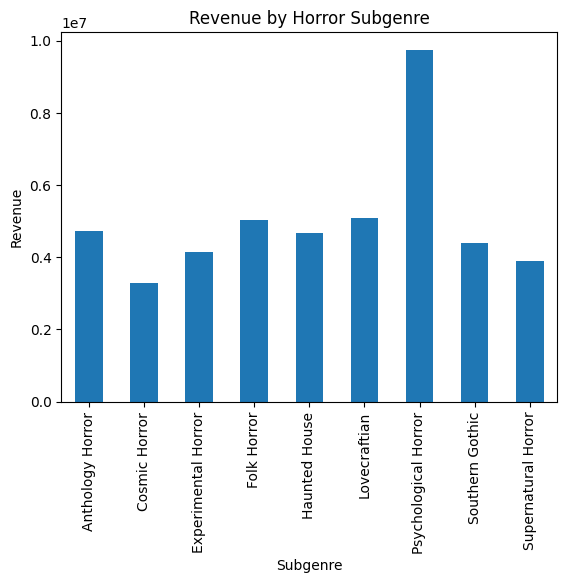

In [16]:
import matplotlib.pyplot as plt

df.groupby("Subgenre")["Revenue"].sum().plot(kind="bar")

plt.title("Revenue by Horror Subgenre")
plt.ylabel("Revenue")
plt.show()